<a href="https://colab.research.google.com/github/francosuriano/ML2022/blob/main/Ej_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Caso elegido: Clustering para dataset de crímenes violentos en EEUU en 1973. 



In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Cargado del dataset

df = pd.read_csv('https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/3_MidtermProjects/ProjectUSA/data/violent_crime.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


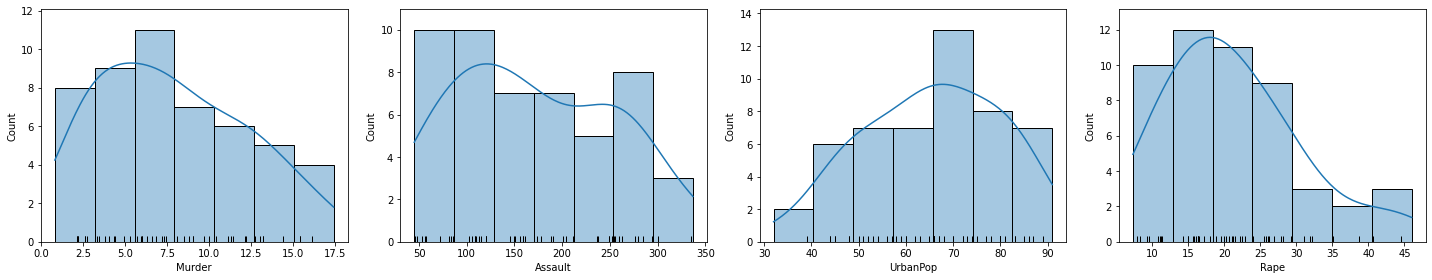

In [5]:
# Armamos histogramas de distribución para observar los features involucrados

def distr_feature(data, ax): # función que calcula la distribución de un feature 

    sns.histplot(data, alpha=0.4, kde=True, ax=ax)
    sns.rugplot(data, color="black", ax=ax)
   
def distr_dataset(df, fig_alto, fig_ancho): # función que calcula las distribuciones de todo el dataset

    cols = df.columns
    fig, axes = plt.subplots(fig_alto, fig_ancho, figsize=((fig_ancho*25)//5, (fig_alto*8)//2))
    axes = axes.ravel()

    for col_name, ax in zip(cols, axes):
        distr_feature(df[col_name], ax)

    fig.tight_layout()
    plt.show()

distr_dataset(df[['Murder'	,'Assault',	'UrbanPop',	'Rape']],1,4)


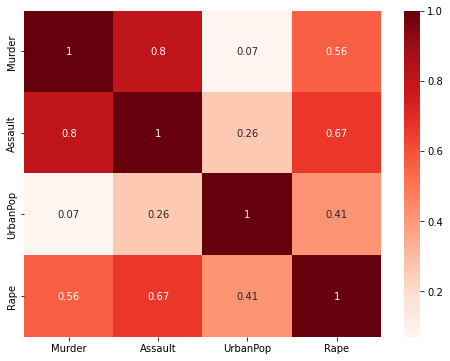

In [7]:
# Hacemos también un mapa de correlación

corr_df = df.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True, cmap="Reds")
plt.show()

Observamos entonces, una correlación alta entre asaltos y asesinatos. 

A continuación, hacemos el modelo de K-Means y elegimos el número de clusters mediante el método "elbow". Para ello, evaluamos el clustering para 10 K distintos, calculando en cada caso el parámetro: WCSS. Este valor corresponde a la suma de la distancia al cuadrado entre cada punto y su centroide. 

Una vez evaluados, graficamos la curva y elegimos el codo de la misma (eligiendo así el número de clusters mas óptimo).

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline


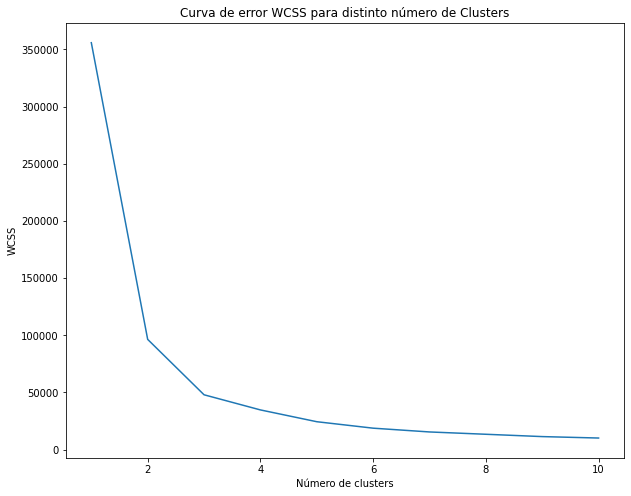

In [9]:
# Curva "elbow" y cálculo de WCSS

plt.figure(figsize=(10, 8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df[['Murder', 'Assault',	'UrbanPop',	'Rape']])
    wcss.append(kmeans.inertia_) #criterion based on which K-means clustering works
plt.plot(range(1, 11), wcss)
plt.title('Curva de error WCSS para distinto número de Clusters')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()



Observamos el codo de la curva, correspondiente al número de clusters óptimo:
K=2

Cálculo del Score de Silhouette para el modelo de K-means:

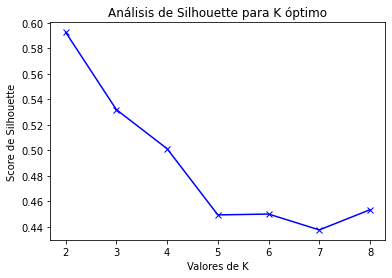

In [11]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []

for num_clusters in range_n_clusters:
 
 # Modelo de  K-Means
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df[['Murder', 'Assault',	'UrbanPop',	'Rape']])
 cluster_labels = kmeans.labels_
 
 # Calculamos el score de Silhouette y graficamos la curva para distinto número de clusters
 silhouette_avg.append(silhouette_score(df[['Murder', 'Assault',	'UrbanPop',	'Rape']], cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Valores de K') 
plt.ylabel('Score de Silhouette') 
plt.title('Análisis de Silhouette para K óptimo')
plt.show()

Observando la curva, el máximo ocurre con K=2, es decir tomando 2 clusters. (coincidente con la curva anterior)

A continuación, hacemos análisis con el método de Clustering Acumulativo:

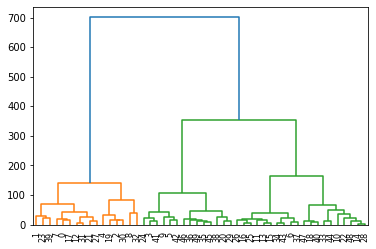

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Primero observamos el dendograma del dataset, 

linkage_data = linkage(df[['Murder', 'Assault',	'UrbanPop',	'Rape']], method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

Observamos la sugerencia de 2 Clusters para la clasificación en el dendograma (esperable). 

                Murder vs Assault


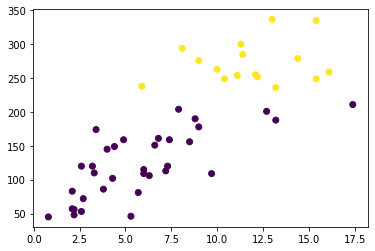

         ----------------------------------
                Murder vs UrbanPop


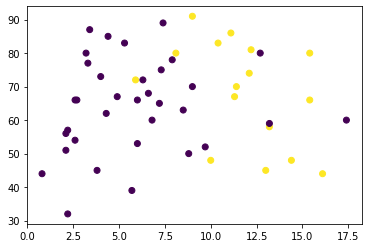

         ----------------------------------
                Murder vs Rape


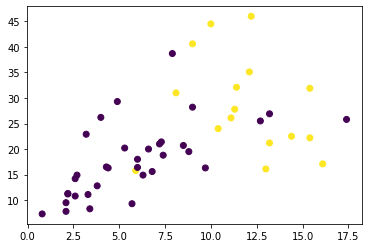

         ----------------------------------
                Assault vs UrbanPop


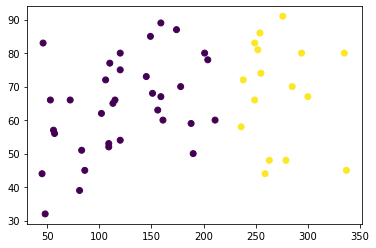

         ----------------------------------
                Assault vs Rape


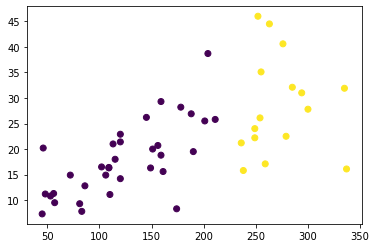

         ----------------------------------
                UrbanPop vs Rape


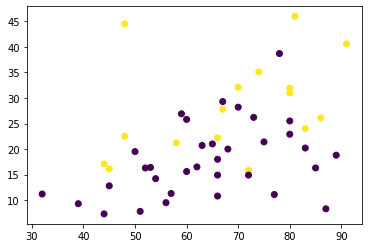

In [25]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df[['Murder', 'Assault',	'UrbanPop',	'Rape']])

# Graficamos los pares de datos con los clusters correspondientes para obtener conclusiones interesantes:

print('                Murder vs Assault')
plt.scatter(df[['Murder']], df[['Assault']], c=labels)
plt.show()
print('         ----------------------------------')
print('                Murder vs UrbanPop')
plt.scatter(df[['Murder']], df[['UrbanPop']], c=labels)
plt.show()
print('         ----------------------------------')
print('                Murder vs Rape')
plt.scatter(df[['Murder']], df[['Rape']], c=labels)
plt.show()
print('         ----------------------------------')
print('                Assault vs UrbanPop')
plt.scatter(df[['Assault']], df[['UrbanPop']], c=labels)
plt.show()
print('         ----------------------------------')
print('                Assault vs Rape')
plt.scatter(df[['Assault']], df[['Rape']], c=labels)
plt.show()
print('         ----------------------------------')
print('                UrbanPop vs Rape')
plt.scatter(df[['UrbanPop']], df[['Rape']], c=labels)
plt.show()


Observamos entonces, que existen dos grupos claros de Estados de EEUU correspondientes a la clasificación de crímenes violentos. 

Por ejemplo, en el gráfico de comparación de 'Murder' y 'Assault' observamos un grupo (o cluster) correspondiente a casos de una tasa alta de asaltos y una tasa alta de asesinatos al mismo tiempo. Esto se corrobora recordando la matriz de correlación (correlación de 0.8 para estas dos categorías). De esta forma, se observa que existe un grupo de estados agresivos, con mayor cantidad de crímenes violentos (color amarillo) y uno con menor cantidad de crímenes violentos (violeta). 

Nuevamente, la división de dos grupos para el Clustering resultó la más óptima mediante todos los métodos implementados. Y dicha elección tiene lógica si se observan graficamente las diferentes combinaciones. 
